<a href="https://colab.research.google.com/github/Jkia65/Assignment-3-Python-Refresher/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

First 5 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


None


Describe:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000



Missing values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


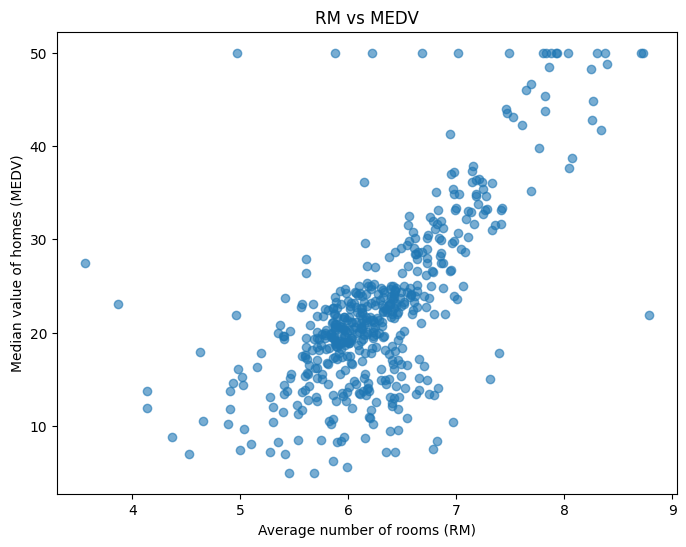

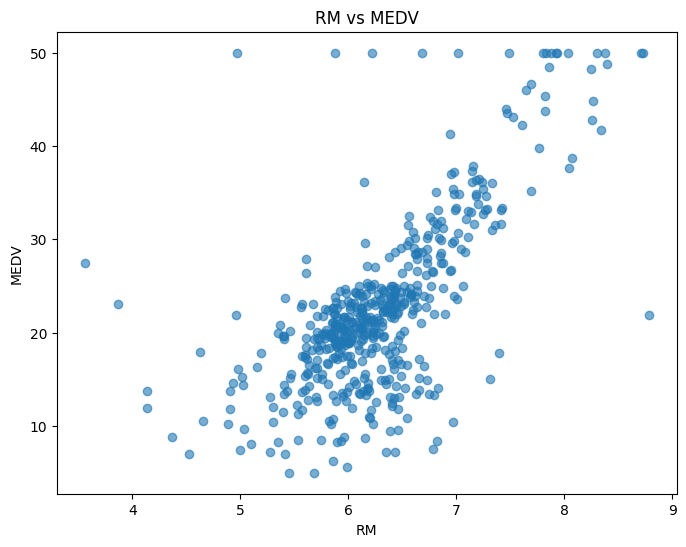

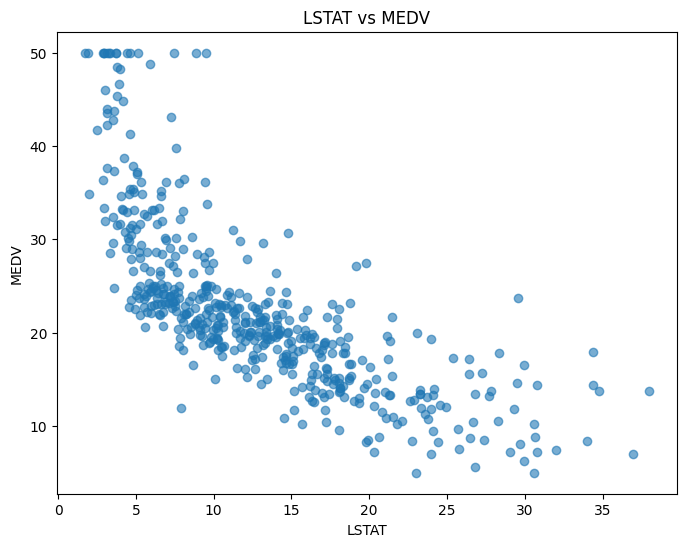

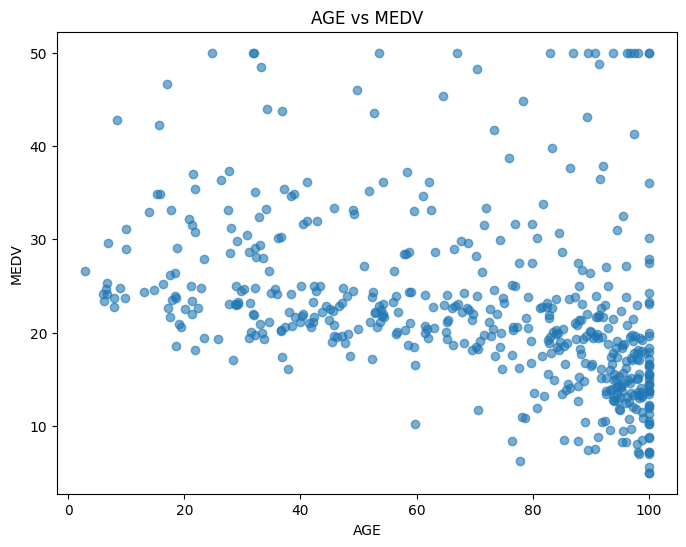

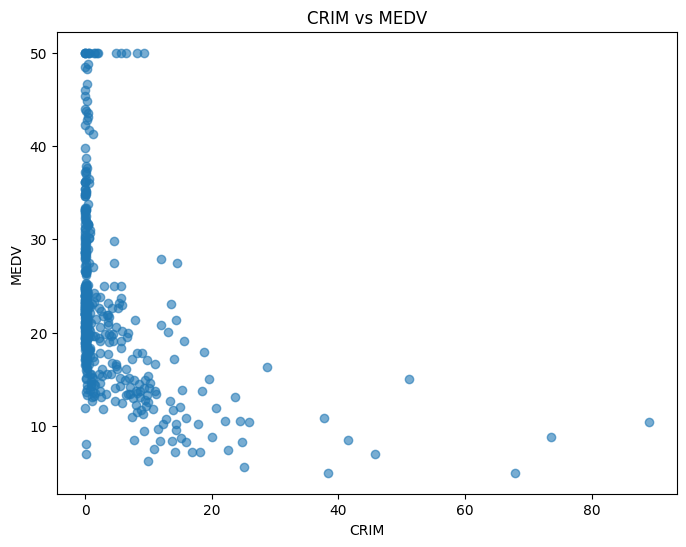

MAE: 2.0395392156862746
RMSE: 2.8109631609391226
R²: 0.8922527442109116

Predicted MEDV for new data: 22.19 ($ 22,189.00)


In [2]:


# --- Imports ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ignore warnings for deprecated dataset
import warnings
warnings.filterwarnings('ignore')

# --- Data Collection and Loading ---
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `load_boston()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:
boston = fetch_openml(name="boston", version=1, as_frame=True)
data = boston.frame


# --- Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

print("First 5 rows:")
display(data.head())


# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

print("\nInfo:")
display(data.info())

print("\nDescribe:")
display(data.describe())


# --- EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

print("\nMissing values per column:")
print(data.isnull().sum())


# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.
# Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target ('MEDV').

# Add your code here:
plt.figure(figsize=(8,6))
plt.scatter(data['RM'], data['MEDV'], alpha=0.6)
plt.title('RM vs MEDV')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Median value of homes (MEDV)')
plt.show()


# TODO: Create a function to automate scatter plots for all features vs the target variable.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
def scatter_plot_features(df, features, target='MEDV', figsize=(8,6)):
    for feature in features:
        plt.figure(figsize=figsize)
        plt.scatter(df[feature], df[target], alpha=0.6)
        plt.title(f'{feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()


# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Example: ['RM', 'LSTAT', 'AGE', 'CRIM']
# Target: 'MEDV'

# Add your code here:
features_to_plot = ['RM', 'LSTAT', 'AGE', 'CRIM']
scatter_plot_features(data, features_to_plot, target='MEDV')


# --- ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# TODO: Choose an appropriate regression model: Decision Tree or Random Forest.
# Hint: Use either `DecisionTreeRegressor` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

# Define your regression model here:
# I'll define both (Decision Tree for interpretability, Random Forest for performance). Uncomment one to use.

model = RandomForestRegressor(n_estimators=100, random_state=42) # better model here

# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

model.fit(X_train, y_train)


# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Perform parameter tuning on the model if needed to improve the performance of your model.

# Add your parameter tuning code here:

# Predict on the test set and calculate the evaluation metrics:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


# --- Model Prediction ---
# TODO: Predict house prices from a new set of feature inputs.
# Example new data: Use hypothetical or randomly generated values for the features.
# Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

# Add your prediction code here:
new_data = pd.DataFrame([{
    'CRIM': 0.2, 'ZN': 12.5, 'INDUS': 7.07, 'CHAS': 0, 'NOX': 0.5,
    'RM': 6.5, 'AGE': 68.0, 'DIS': 4.0, 'RAD': 2.0, 'TAX': 250.0,
    'PTRATIO': 17.0, 'B': 400.0, 'LSTAT': 12.0
}])

new_pred = model.predict(new_data)
print(f"\nPredicted MEDV for new data: {float(new_pred[0]):.2f} ($ {float(new_pred[0])*1000:,.2f})")

